# Matplotlib Demo Code

### Imports
* We can shorted the import to plt which saves time later

* pyplot is a general module that we will use but feel free to explore other aspects of Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading in DataFrame

In [2]:
df = pd.read_csv("Michigan_GameLogs_W24.csv")
df

,id,date,year,opponent,home_away,result,points_scored,points_against,pass_cmp,pass_att,...,pass_yrds,pass_td,pass_1st_down,rush_att,rush_yrds,rush_td,rush_1st_down,total_offense,fumbles,ints
0,1,2011-09-03,2011,Western Michigan,Home,W,34,10,9,13,...,98,0,5,26,190,3,9,288,0,0
1,2,2011-09-10,2011,Notre Dame,Home,W,35,31,11,24,...,338,4,10,26,114,1,5,452,0,3
2,3,2011-09-17,2011,Eastern Michigan,Home,W,31,3,7,18,...,95,2,5,50,376,2,19,471,0,1
3,4,2011-09-24,2011,San Diego State,Home,W,28,7,8,17,...,93,0,3,45,320,4,14,413,2,2
4,5,2011-10-01,2011,Minnesota,Home,W,58,0,18,25,...,217,3,10,48,363,3,19,580,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,161,2023-11-18,2023,Maryland,Away,W,31,24,12,23,...,141,0,9,45,150,3,9,291,0,1
161,162,2023-11-25,2023,Ohio State,Home,W,30,24,17,21,...,182,1,10,39,156,2,8,338,0,0
162,163,2023-12-02,2023,Iowa,Nuetral,W,26,0,22,30,...,147,0,9,34,66,2,3,213,0,0
163,164,2024-01-01,2024,Alabama,Nuetral,W,27,20,17,27,...,221,3,10,32,130,1,5,351,1,0


In [3]:
df.rename(columns = {
    'home_away': 'Home/Away',
    'points_scored': 'Points Scored',
    'points_against': 'Points Against',
    'pass_cmp': 'Pass Completions',
    'pass_att': 'Pass Attempts',
    'pass_pct' : 'Pass Percentage',
    'pass_yrds': 'Pass Yards',
    'pass_td': 'Pass TDs',
    'pass_1st_down': 'Pass 1st Downs',
    'rush_att': 'Rush Attempts',
    'rush_yrds': 'Rush Yards',
    'rush_td': 'Rush TDs',
    'rush_1st_down': 'Rush 1st Downs',
    'total_offense' : 'Total Offense'
}, inplace = True)
df.columns = [col.lower() for col in df]
df.columns

Index(['id', 'date', 'year', 'opponent', 'home/away', 'result',
       'points scored', 'points against', 'pass completions', 'pass attempts',
       'pass percentage', 'pass yards', 'pass tds', 'pass 1st downs',
       'rush attempts', 'rush yards', 'rush tds', 'rush 1st downs',
       'total offense', 'fumbles', 'ints'],
      dtype='object')

### Scatter Plots

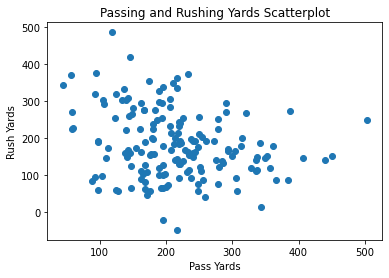

In [5]:
# basic scatter plot with axes labels
plt.scatter(df['pass yards'], df['rush yards'])
plt.xlabel("Pass Yards")       #use xlabel and ylabel to add labels to the axes
plt.ylabel("Rush Yards")
plt.title('Passing and Rushing Yards Scatterplot')     # use title to add a title for the entire plot
plt.show()

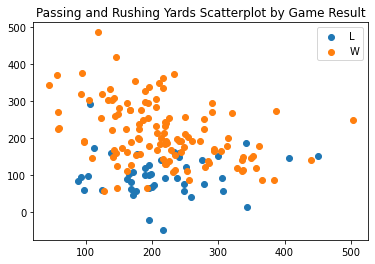

In [6]:
# we can change the colors of each data point based on a certain condition, in this case result
plt.clf()
groups = df.groupby('result')
for result, group in groups:
    plt.scatter(group['pass yards'], group['rush yards'], label = result)
plt.legend()
plt.title('Passing and Rushing Yards Scatterplot by Game Result')
plt.show()

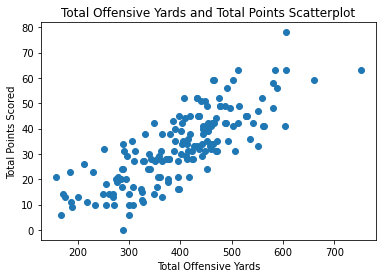

In [7]:
# Another basic scatter plot with variables that are more correlated
plt.clf()
plt.scatter(df['total offense'], df['points scored'])
plt.xlabel('Total Offensive Yards')
plt.ylabel('Total Points Scored')
plt.title('Total Offensive Yards and Total Points Scatterplot')
plt.show()

### Bar Graph

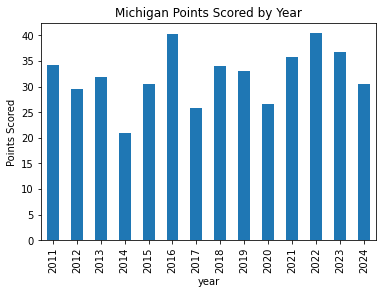

In [9]:
# basic bar graph that shows Michigan's points for each year
plt.clf()
avg_points = df.groupby('year')['points scored'].mean()
avg_points.plot(kind = 'bar')
plt.ylabel('Points Scored')
plt.title('Michigan Points Scored by Year')
plt.show()

<Figure size 432x288 with 0 Axes>

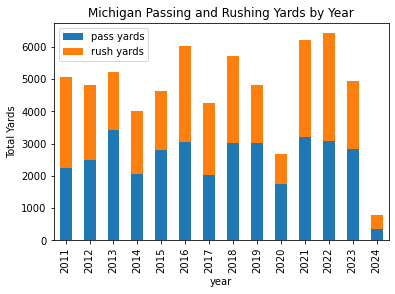

In [10]:
# stacked bar chart showing how Michigan's rushing and passing yards compiled each year
plt.clf()
avg_yards = df.groupby('year')[['pass yards', 'rush yards']].sum()
avg_yards.plot(kind = 'bar', stacked = True)
plt.ylabel('Total Yards')
plt.title('Michigan Passing and Rushing Yards by Year')
plt.show()

<Figure size 432x288 with 0 Axes>

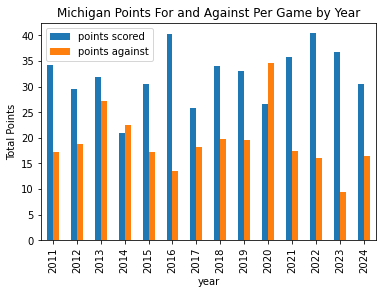

In [11]:
# side-by-side bar chart showing Michigan's points scored and allowed each year
plt.clf()
points = df.groupby('year')[['points scored', 'points against']].mean()
points.plot(kind = 'bar')
plt.ylabel('Total Points')
plt.title('Michigan Points For and Against Per Game by Year')
plt.show()

### Pie Charts

In [12]:
# This creates a list of the top 10 most common michigan football opponents
top_10_opps = df['opponent'].value_counts()[:10].index.tolist()
top_10_opps

['Michigan State',
 'Ohio State',
 'Indiana',
 'Penn State',
 'Rutgers',
 'Maryland',
 'Minnesota',
 'Iowa',
 'Northwestern',
 'Nebraska']

In [13]:
# This creates a new df that only contains the rows in which michigan played one of the top 10 most frequent colleges
opponent_freq_df = df[df['opponent'].isin(top_10_opps)]
opponent_freq_df.head(5)

,id,date,year,opponent,home/away,result,points scored,points against,pass completions,pass attempts,...,pass yards,pass tds,pass 1st downs,rush attempts,rush yards,rush tds,rush 1st downs,total offense,fumbles,ints
4,5,2011-10-01,2011,Minnesota,Home,W,58,0,18,25,...,217,3,10,48,363,3,19,580,0,0
5,6,2011-10-08,2011,Northwestern,Away,W,42,24,19,28,...,362,2,14,50,179,4,8,541,0,3
6,7,2011-10-15,2011,Michigan State,Away,L,14,28,12,31,...,168,1,6,36,82,1,8,250,0,1
8,9,2011-11-05,2011,Iowa,Away,L,16,24,18,38,...,196,2,10,37,127,0,10,323,1,1
10,11,2011-11-19,2011,Nebraska,Home,W,45,17,11,19,...,180,2,6,61,238,4,14,418,0,1


<AxesSubplot:title={'center':'Top 10 Michigan Football Opponents by Percentage'}, ylabel='None'>

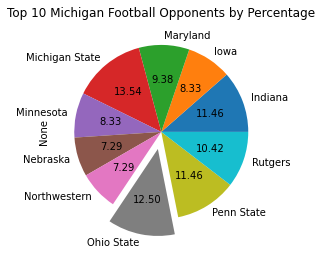

In [15]:
# pie chart that displays this data by opponent
opponent_freq_df.groupby('opponent').size().plot(kind = 'pie',
                                                 autopct = '%.2f',
                                                 explode = [0,0,0,0,0,0,0,0.2,0,0], 
                                                 title = 'Top 10 Michigan Football Opponents by Percentage')

### Other Plots

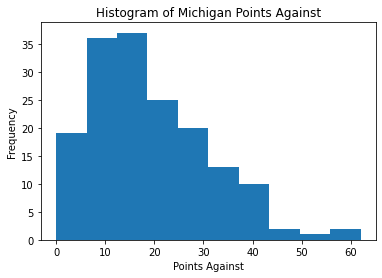

In [16]:
# Basic Histogram
plt.clf()
plt.hist(df['points against'])
plt.xlabel('Points Against')
plt.ylabel('Frequency')
plt.title('Histogram of Michigan Points Against')
plt.show()

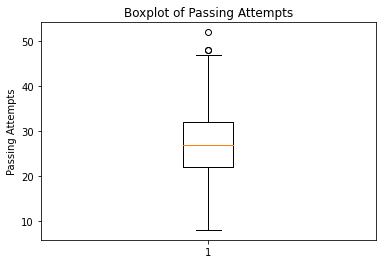

In [17]:
# Basic Boxplot
plt.clf()
pass_att_df = df['pass attempts']
plt.boxplot(pass_att_df)
plt.ylabel('Passing Attempts')
plt.title('Boxplot of Passing Attempts')
plt.show()

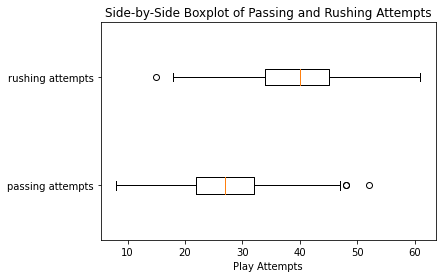

In [18]:
# Side-by-Side Boxplot
plt.clf()
att_df = df[['pass attempts', 'rush attempts']]
plt.boxplot(att_df, vert = False, labels = ['passing attempts', 'rushing attempts'])
plt.xlabel('Play Attempts')
plt.title('Side-by-Side Boxplot of Passing and Rushing Attempts')
plt.show()